<a href="https://colab.research.google.com/github/lalit0801/AI-ML-SS-/blob/main/Amazon_Alexa_Reviews_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The sentiment analysis has to be performed for a Amazon product that is Alexa

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [324]:
# Load data
data= pd.read_csv('/content/amazon_alexa.tsv',delimiter = '\t', quoting = 3, encoding ='ISO-8859-1')

In [325]:
data.shape

(3150, 5)

In [326]:
data.head()

,ï»¿rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [327]:
#Column names
print(f"Column names : {data.columns.values}")

Column names : ['ï»¿rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [328]:
data= data.rename(columns={'ï»¿rating': 'Rating'})

In [329]:
#Column names
print(f"Column names : {data.columns.values}")

Column names : ['Rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [330]:
data.isnull().sum()

Rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [331]:
#Getting the record where 'verified_reviews' is null

data[data['verified_reviews'].isna() == True]

,Rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [332]:
# dropping the column as it has no review written in body
data.dropna(inplace=True)

In [333]:
data.isnull().sum()

Rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [334]:
data.shape

(3149, 5)

In [335]:
data.head()

,Rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [336]:
data['Rating'].value_counts()

Rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [337]:
data['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [338]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [339]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


The above analysis suggest that if:
 feedback--> 0 : It is negative review
 feedback-->1: It is positive review

Now we will see the corresponding rating to these positive and negative feedbacks

In [340]:
#Feedback = 0
data[data['feedback'] == 0]['Rating'].value_counts()

Rating
1    161
2     95
Name: count, dtype: int64

In [341]:

#Feedback = 1
data[data['feedback'] == 1]['Rating'].value_counts()

Rating
5    2286
4     455
3     152
Name: count, dtype: int64

Now there a field for neutral revirew is missing so we create a new column in which:
If the rating is 1 or 2, assign -1 as the feedback value.
If the rating is 3, assign 0 as the feedback value.
If the rating is 4 or 5, assign 1 as the feedback value.

In [342]:
def map_feedback(Rating):
    if Rating in [1, 2]:
        return -1
    elif Rating == 3:
        return 0
    elif Rating in [4, 5]:
        return 1

In [343]:
# Apply the function to create a new column 'new_feedback' based on 'rating'
data['new_feedback'] = data['Rating'].apply(map_feedback)

In [344]:
print(data)

      Rating       date                     variation  \
0          5  31-Jul-18              Charcoal Fabric    
1          5  31-Jul-18              Charcoal Fabric    
2          4  31-Jul-18                Walnut Finish    
3          5  31-Jul-18              Charcoal Fabric    
4          5  31-Jul-18              Charcoal Fabric    
5          5  31-Jul-18          Heather Gray Fabric    
6          3  31-Jul-18             Sandstone Fabric    
7          5  31-Jul-18              Charcoal Fabric    
8          5  30-Jul-18          Heather Gray Fabric    
9          5  30-Jul-18          Heather Gray Fabric    
10         5  30-Jul-18              Charcoal Fabric    
11         5  30-Jul-18              Charcoal Fabric    
12         5  30-Jul-18                   Oak Finish    
13         5  30-Jul-18              Charcoal Fabric    
14         5  30-Jul-18                   Oak Finish    
15         5  30-Jul-18          Heather Gray Fabric    
16         5  30-Jul-18        

In [345]:
data[data['new_feedback'] == 1]['Rating'].value_counts()

Rating
5    2286
4     455
Name: count, dtype: int64

In [346]:
data[data['new_feedback'] == 0]['Rating'].value_counts()

Rating
3    152
Name: count, dtype: int64

In [347]:
data[data['new_feedback'] == -1]['Rating'].value_counts()

Rating
1    161
2     95
Name: count, dtype: int64

In [348]:
data.head()

,Rating,date,variation,verified_reviews,feedback,new_feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,1
4,5,31-Jul-18,Charcoal Fabric,Music,1,1


Preprocessing
Stemming: The process of reducing a word to its root word
eg. act is root word for actor, acting.

In [349]:
port_stem = PorterStemmer()

In [350]:
def stemming(content):
  stemmed_content= re.sub('[^a-zA-Z]',' ',content)
  stemmed_content= stemmed_content.lower()
  stemmed_content= stemmed_content.split()
  stemmed_content= [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [351]:
data['stemmed_content']= data['verified_reviews'].apply(stemming)

In [352]:
data.head()

,Rating,date,variation,verified_reviews,feedback,new_feedback,stemmed_content
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,1,love
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,1,sometim play game answer question correctli al...
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,1,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,1,music


In [353]:
data['stemmed_content']

0                                               love echo
1                                                    love
2       sometim play game answer question correctli al...
3       lot fun thing yr old learn dinosaur control li...
4                                                   music
5       receiv echo gift need anoth bluetooth someth p...
6       without cellphon cannot use mani featur ipad s...
7       think th one purchas work get one everi room h...
8                                              look great
9       love listen song heard sinc childhood get news...
10                      sent year old dad talk constantli
11      love learn knew thing eveyday still figur ever...
12      purchas mother knee problem give someth tri co...
13                                         love love love
14                                                 expect
15                                         love wife hate
16            realli happi purchas great speaker easi set
17      use al

In [354]:
data['new_feedback']

0       1
1       1
2       1
3       1
4       1
5       1
6       0
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      0
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      0
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46     -1
47      1
48      1
49      0
50      1
51      1
52      1
53      1
54      0
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


In [355]:
data.head()

,Rating,date,variation,verified_reviews,feedback,new_feedback,stemmed_content
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,1,love
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,1,sometim play game answer question correctli al...
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,1,lot fun thing yr old learn dinosaur control li...
4,5,31-Jul-18,Charcoal Fabric,Music,1,1,music


In [356]:
 # dropping the feedback column since we have created a new_feedback column
data.drop(columns=['feedback'], inplace=True)

Before goining towards training and model selection, we plot the dataset to see the new_feedback column insights

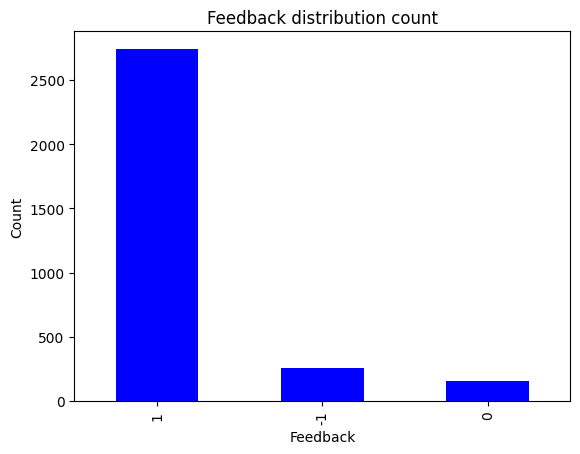

In [357]:
#Bar graph to visualize the total counts of each feedback

data['new_feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [358]:
#seperating the data and label

X= data['stemmed_content'].values
Y= data['new_feedback'].values

In [359]:
print(X)

['love echo' 'love'
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home'
 ...
 'love thing run entir home tv light thermostat front door dead bolt camera love listen npr thing well worth valu realli shine stat ad smart devic control entir home like right star trek name mine comput get feel amaz devic smart system'
 'complaint sound qualiti great mostli use command though anoth dot hook stereo system play music coupl friend dot mind audio qualiti bother kind thing go full size echo make sure hook larger speaker'
 'good']


In [360]:
print(Y.tolist())

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

Now splitting the dataset into training and test data

In [361]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.4, stratify= Y, random_state= 2)

In [362]:
print(X.shape, X_train, X_test.shape)

(3149,) ['th amazon echo devic purchas refurbish satisfi time differ tell brand new price cheaper echo wake us keep timer play music us act encyclopedia turn light much'
 'work great'
 'overal great like see lyric time date howev sometim freez respond properli error messag lack connect stop reset resolv problem'
 ... 'love hard time set app'
 'use yet sure great other get amaz echo echo dot greatest technolog ever came'
 'awesom cute smart'] (1260,)


In [363]:
#feature extraction(converting textual data to numerical data)
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [364]:
print(X_train)

  (0, 1332)	0.1492256541499579
  (0, 1186)	0.14759463594882305
  (0, 2168)	0.15608253404972558
  (0, 678)	0.28807464038827
  (0, 25)	0.2421084270110686
  (0, 1335)	0.10728449895588031
  (0, 1531)	0.12821885554616647
  (0, 2108)	0.18750810023595757
  (0, 1126)	0.1820215016029955
  (0, 2215)	0.40717698455541534
  (0, 2261)	0.1912426974122905
  (0, 354)	0.26264177558888097
  (0, 1574)	0.16852899253910922
  (0, 1367)	0.1492256541499579
  (0, 264)	0.21667556221167955
  (0, 2063)	0.1678300786850981
  (0, 567)	0.17724960939851153
  (0, 2107)	0.13218941410111723
  (0, 1754)	0.23288723120177357
  (0, 1673)	0.18750810023595757
  (0, 1609)	0.14759463594882305
  (0, 560)	0.12683409241649904
  (0, 645)	0.1934578127000899
  (0, 96)	0.13519191032268785
  (0, 2076)	0.25445422187648575
  :	:
  (1884, 1199)	0.19438333451050138
  (1884, 1367)	0.3579446319488103
  (1884, 1673)	0.22488598997506695
  (1884, 645)	0.11601085945813411
  (1886, 123)	0.4885604741220375
  (1886, 945)	0.6407605922944747
  (1886, 1

In [365]:
print(X_test)

  (0, 2040)	0.5208275204760854
  (0, 1924)	0.7281884566275328
  (0, 1375)	0.44551124065408776
  (1, 1918)	0.242020606142899
  (1, 1732)	0.31598167603374405
  (1, 1615)	0.31778353437536133
  (1, 1588)	0.2640809746560456
  (1, 1335)	0.22653571501207534
  (1, 914)	0.5951108812698045
  (1, 779)	0.32957481086239604
  (1, 454)	0.39593121066797266
  (2, 2280)	0.2466058204953113
  (2, 2174)	0.22199622940952746
  (2, 2086)	0.28683774197245376
  (2, 2041)	0.36079901203572723
  (2, 1977)	0.1730291110100237
  (2, 1929)	0.16208470270582961
  (2, 1720)	0.2506044040395341
  (2, 1586)	0.2970922415925526
  (2, 1440)	0.24472985713076761
  (2, 1427)	0.15426753037672342
  (2, 1221)	0.10310154464621293
  (2, 880)	0.23059948357445645
  (2, 877)	0.23484447371919492
  (2, 645)	0.12114809481096436
  :	:
  (1256, 1335)	0.1245035944011209
  (1256, 1142)	0.19640463054050608
  (1256, 1134)	0.3343104412399745
  (1256, 659)	0.3343104412399745
  (1256, 555)	0.29529396643956074
  (1256, 454)	0.21760303385769608
  (125

Training the machine learning model

Logistic regression

In [366]:
model= LogisticRegression(max_iter=2000)


In [367]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

Model Evaluation

Accuracy Score

In [368]:
#accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(Y_train, X_train_prediction)

In [369]:
print('Accuracy score on training data: ', training_data_accuracy)

Accuracy score on training data:  0.8930651138168343


In [370]:
#accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy= accuracy_score(Y_test, X_test_prediction)
print(X_test_prediction)

[1 1 1 ... 1 1 1]


In [371]:
print('Accuracy score on testing data: ', test_data_accuracy)

Accuracy score on testing data:  0.8809523809523809


Model accuracy = 88.09%

Saving the Trained Model into a pickle file

In [372]:
filename = 'amazon_product_trained_model.pkl'
pickle.dump(model, open(filename,'wb'))

Model Testing

In [373]:
#loading the saved model
loaded_model = pickle.load(open('/content/amazon_product_trained_model.pkl','rb'))

In [374]:
X_new= X_test[14]
print(Y_test[14])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==-1):
  print('Negative review')

if(prediction[0]==0):
  print('Neutral review')

else:
  print('Positive review')

0
[1]
Positive review


In [375]:
X_new= X_test[29]
print(Y_test[29])

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==-1):
  print('Negative review')

if(prediction[0]==0):
  print('Neutral review')

if(prediction[0]==1):
  print('Neutral review')

-1
[-1]
Negative review
